#**NHẬN DIỆN 11 LOẠI TIỀN VIỆT NAM DÙNG THUẬT TOÁN CNN**

**Load thư viện**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

**Liên kết drive**

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Tạo tập train, validation và test**

In [36]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

**Gắn giá trị train, validation, test**

In [37]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Train1',
                        target_size=(300, 300),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Validation1",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")
test_generator = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Test1",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")

Found 165 images belonging to 11 classes.
Found 55 images belonging to 11 classes.
Found 22 images belonging to 11 classes.


**Xem nhãn các loại tiền**

In [38]:
training_generator.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '500đ': 7,
 '50k': 8,
 '5k': 9,
 'Không phải tiền VN': 10}

**Tạo mô hình**

In [39]:
#CNN
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(300,300,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(11,activation='softmax'))

In [40]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                 

**Chạy mô hình**

In [41]:
history = model.fit(training_generator,batch_size=20,epochs=50,verbose=1,validation_data=validation_generator)

Epoch 1/50
4/4 [==============================] - 5s 1s/step - loss: 101.2415 - accuracy: 0.0727 - val_loss: 10.1758 - val_accuracy: 0.0909
Epoch 2/50
4/4 [==============================] - 4s 1s/step - loss: 4.3882 - accuracy: 0.0727 - val_loss: 2.3737 - val_accuracy: 0.1273
Epoch 3/50
4/4 [==============================] - 4s 969ms/step - loss: 2.3871 - accuracy: 0.1879 - val_loss: 2.3694 - val_accuracy: 0.1455
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 2.3424 - accuracy: 0.2061 - val_loss: 2.3096 - val_accuracy: 0.1818
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 2.1974 - accuracy: 0.2121 - val_loss: 2.3328 - val_accuracy: 0.1636
Epoch 6/50
4/4 [==============================] - 4s 1s/step - loss: 2.0504 - accuracy: 0.3212 - val_loss: 2.3233 - val_accuracy: 0.3091
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 2.0181 - accuracy: 0.3515 - val_loss: 2.2339 - val_accuracy: 0.3091
Epoch 8/50
4/4 [===================

**Lưu mô hình**

In [42]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienTienVN.h5')


**Tải mô hình**

In [43]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienTienVN.h5')

**Vẽ biểu đồ độ chính xác**

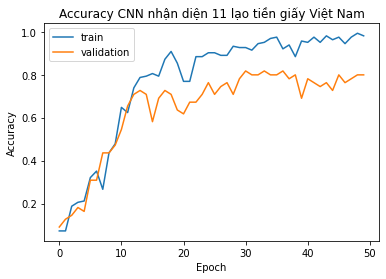

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN nhận diện 11 lạo tiền giấy Việt Nam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Kiểm tra, dự đoán kết quả**

*Load thư viện*

In [45]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

*Kiểm tra tập test*

In [46]:
import numpy as np
result=np.argmax(model.predict(test_generator),axis=1)
result

array([ 7,  4,  0, 10,  9,  7,  4,  4,  4,  0,  7,  9,  8,  9, 10,  3,  6,
        6,  0,  6,  9, 10])

*Tải ảnh bên ngoài*

Đây là mệnh giá 100.000


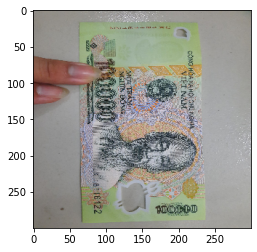

In [47]:
#Load ảnh lên
img=load_img('/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Test1/100k/z3433067323069_13e8c7819c51fe8be732bc3ae44304be.jpg',
             target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là mệnh giá 100.000")
elif result == 1:
    print("Đây là mệnh giá 10.000")
elif result == 2:
    print("Đây là mệnh giá 1.000")
elif result == 3:
    print("Đây là mệnh giá 200.000")
elif result == 4:
    print("Đây là mệnh giá 20.000")
elif result == 5:
    print("Đây là mệnh giá 2.000")
elif result == 6:
    print("Đây là mệnh giá 500.000")
elif result == 7:
    print("Đây là mệnh giá 500")
elif result == 8:
    print("Đây là mệnh giá 50.000")
elif result == 9:
    print("Đây là mệnh giá 5000")
else:
    print("Đây không phải tiền VN")



Đây là mệnh giá 200.000


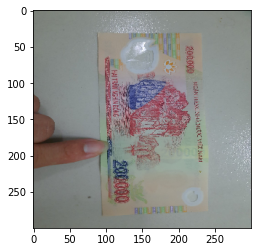

In [48]:
#Load ảnh lên
img=load_img('/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Test1/200k/z3433067319535_be215e7bbe3e302c046695fbc056bcfc.jpg',
             target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là mệnh giá 100.000")
elif result == 1:
    print("Đây là mệnh giá 10.000")
elif result == 2:
    print("Đây là mệnh giá 1.000")
elif result == 3:
    print("Đây là mệnh giá 200.000")
elif result == 4:
    print("Đây là mệnh giá 20.000")
elif result == 5:
    print("Đây là mệnh giá 2.000")
elif result == 6:
    print("Đây là mệnh giá 500.000")
elif result == 7:
    print("Đây là mệnh giá 500")
elif result == 8:
    print("Đây là mệnh giá 50.000")
elif result == 9:
    print("Đây là mệnh giá 5000")
else:
    print("Đây không phải tiền VN")

Đây là mệnh giá 500


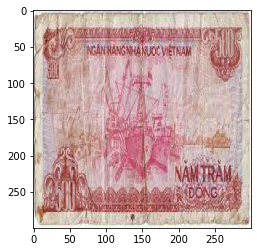

In [49]:
#Load ảnh lên
img=load_img('/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Test1/500đ/download (1).jpg',
             target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là mệnh giá 100.000")
elif result == 1:
    print("Đây là mệnh giá 10.000")
elif result == 2:
    print("Đây là mệnh giá 1.000")
elif result == 3:
    print("Đây là mệnh giá 200.000")
elif result == 4:
    print("Đây là mệnh giá 20.000")
elif result == 5:
    print("Đây là mệnh giá 2.000")
elif result == 6:
    print("Đây là mệnh giá 500.000")
elif result == 7:
    print("Đây là mệnh giá 500")
elif result == 8:
    print("Đây là mệnh giá 50.000")
elif result == 9:
    print("Đây là mệnh giá 5000")
else:
    print("Đây không phải tiền VN")

Đây là mệnh giá 20.000


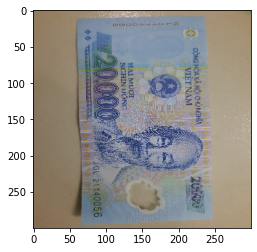

In [50]:
#Load ảnh lên
img=load_img('/content/drive/MyDrive/Python/BTVN3/CNN_Nhận diện 11 loại tiền Việt Nam/Datasets/Test1/20k/z3433067285535_6be66d02e628f0d5c45b655ea93bd819.jpg',
             target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là mệnh giá 100.000")
elif result == 1:
    print("Đây là mệnh giá 10.000")
elif result == 2:
    print("Đây là mệnh giá 1.000")
elif result == 3:
    print("Đây là mệnh giá 200.000")
elif result == 4:
    print("Đây là mệnh giá 20.000")
elif result == 5:
    print("Đây là mệnh giá 2.000")
elif result == 6:
    print("Đây là mệnh giá 500.000")
elif result == 7:
    print("Đây là mệnh giá 500")
elif result == 8:
    print("Đây là mệnh giá 50.000")
elif result == 9:
    print("Đây là mệnh giá 5000")
else:
    print("Đây không phải tiền VN")